In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df=pd.read_csv("/content/Heart (1) - Heart (1).csv")

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df.shape

(303, 15)

In [ ]:
df['Ca'].fillna(df['Ca'].mode()[0], inplace=True)
df['Ca'].isnull().sum()
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)


<ipython-input-46-6fb988535aca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].mode()[0], inplace=True)
<ipython-input-46-6fb988535aca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
X = df.drop(columns=["AHD"])
y = df["AHD"]
X.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [ ]:
X['ChestPain'] = X['ChestPain'].replace({
    'typical': 0,
    'nontypical': 1,
    'nonanginal': 2,
    'asymptomatic': 3
})
X['Thal'] = X['Thal'].replace({'normal': 0, 'fixed': 1, 'reversable': 2})

<ipython-input-50-8a241620c84e>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Thal'] = X['Thal'].replace({'normal': 0, 'fixed': 1, 'reversable': 2})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[26  3]
 [ 3 29]]


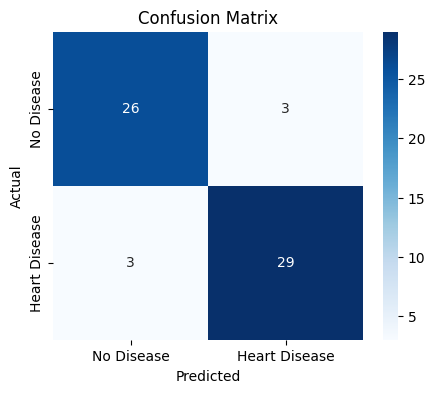

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # Now y is numeric 0/1

# Then split, train, predict, and evaluate


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Yes', zero_division=1)
recall = recall_score(y_test, y_pred,pos_label='Yes',zero_division=1)
f1 = f1_score(y_test, y_pred,pos_label='Yes', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.91
Recall: 0.91
F1-Score: 0.91
